# Offline plotting with complex data

This notebook is a collection of plotting examples using the `plot_dataset` function and complex data. We cover the cases where the dependent (measured) parameter is complex, and the case where the independent parameter is complex.

The behavior of the `plot_dataset` with respect to compex-valued parameters is as follows: one complex-valued parameter is converted into two real-valued parameters.

We start by initialising our database and creating an experiment.

In [1]:
%matplotlib inline
import numpy as np

from qcodes import Measurement, initialise_database, load_or_create_experiment
from qcodes.dataset.plotting import plot_dataset

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/runner/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


Qcodes Logfile : /home/runner/.qcodes/logs/211031-5678-qcodes.log


In [2]:
initialise_database()
exp = load_or_create_experiment('offline_plotting_complex_numbers', '')

## Case A: a complex number as a function of a real number

Now, we are ready to perform a measurement. To this end, let us register our custom parameters.

In [3]:
meas_A = Measurement(exp)
meas_A.register_custom_parameter(name='freqs',
                                 label='Frequency',
                                 unit='Hz',
                                 paramtype='numeric')
meas_A.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex',
                                 setpoints=['freqs'])

In [4]:
N = 1000
freqs = np.linspace(0, 1e6, N)
signal = np.cos(2*np.pi*1e-6*freqs) + 1j*np.sin(2*np.pi*1e-6*freqs)

with meas_A.run() as datasaver:
    datasaver.add_result(('freqs', freqs), ('iandq', signal))

ds = datasaver.dataset

Starting experimental run with id: 29. 


When visualising the data, the `plot_dataset` will turn the complex `signal` parameter into to real parameters. The `plot_dataset` function can do this "transformation" in one of two ways: either casting the amplitudes of the real and imaginary parts or calculating the magnitude and phase. By default, the `plot_dataset` uses the former.

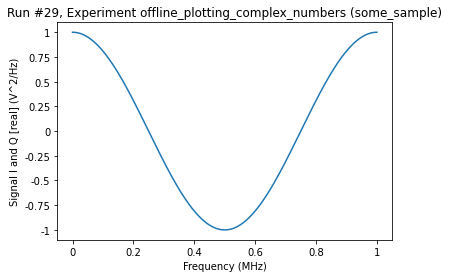

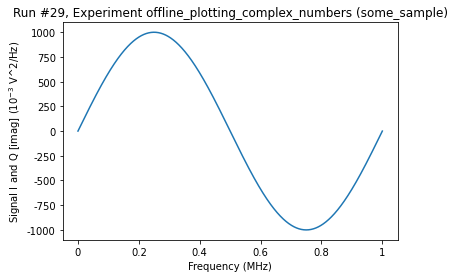

In [5]:
axs, cbs = plot_dataset(ds)

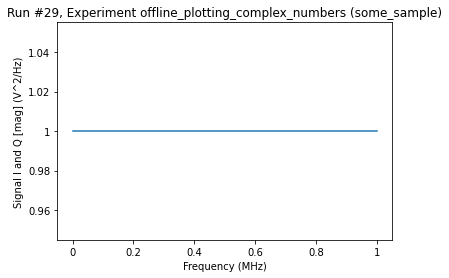

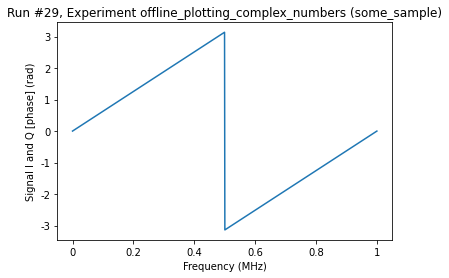

In [6]:
axs, cbs = plot_dataset(ds, complex_plot_type='mag_and_phase')

Note that the phase can be visualized either in degrees or in radians. The keyword argument `complex_plot_phase` of the `plot_dataset` function controls this behaviour. The default is radians.

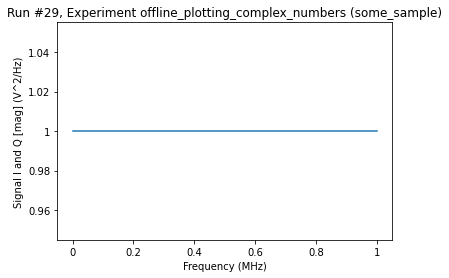

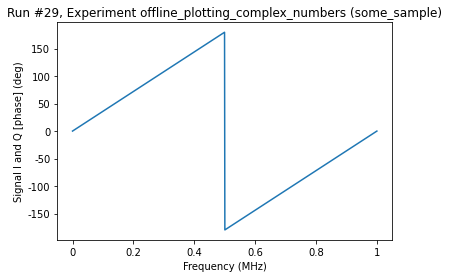

In [7]:
axs, cbs = plot_dataset(ds,
                      complex_plot_type='mag_and_phase',
                      complex_plot_phase='degrees')

## Case B: a complex number as a function of two real numbers

In [8]:
meas_B = Measurement(exp)
meas_B.register_custom_parameter(name='freqs',
                                 label='Frequency',
                                 unit='Hz',
                                 paramtype='numeric')
meas_B.register_custom_parameter(name='magfield',
                                 label='Magnetic field',
                                 unit='T',
                                 paramtype='numeric')
meas_B.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex',
                                 setpoints=['freqs', 'magfield'])

In [9]:
N = 250
M = 20
freqs = np.linspace(0, 1e6, N)
fields = np.linspace(0, 2, M)

with meas_B.run() as datasaver:
    for field in fields:
        phis = 2*np.pi*field*1e-6*freqs
        signal = np.cos(phis) + 1j*np.sin(phis)
        datasaver.add_result(('freqs', freqs), ('iandq', signal),
                             ('magfield', field))

run_B_id = datasaver.run_id
ds2 = datasaver.dataset

Starting experimental run with id: 30. 


When visualising this run, we get two plots just as in the previous case. This time, however, the plots are heatmaps and not line plots.

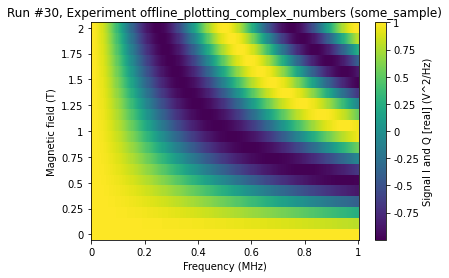

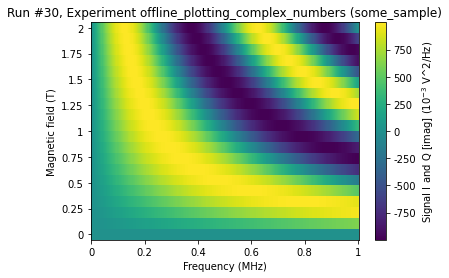

In [10]:
axs, cbs = plot_dataset(ds2, complex_plot_type='real_and_imag')

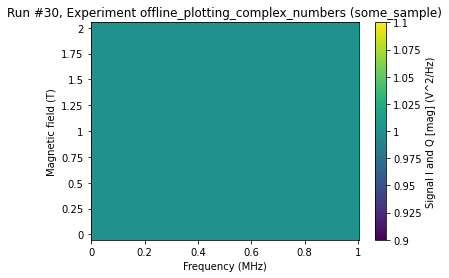

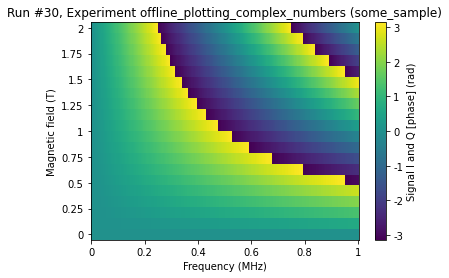

In [11]:
axs, cbs = plot_dataset(ds2, complex_plot_type='mag_and_phase')

## Case C: a real number as a function of a complex number

As expected, the single complex setpoint parameter is turned into two real-valued setpoint parameters.

In [12]:
meas_C = Measurement(exp)
meas_C.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex')
meas_C.register_custom_parameter(name='temp',
                                 label='Temperature',
                                 unit='K',
                                 paramtype='numeric',
                                 setpoints=['iandq'])

In [13]:
N = 250
phis = 2*np.pi*np.linspace(1e-9, 1, N)
signal = phis**2*(np.cos(phis) + 1j*np.sin(phis))
heat = np.abs(signal)

with meas_C.run() as datasaver:
    datasaver.add_result(('iandq', signal), ('temp', heat))
    
run_C_id = datasaver.run_id
ds3 = datasaver.dataset

Starting experimental run with id: 31. 


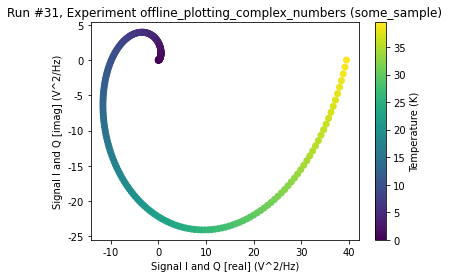

In [14]:
axs, cbs = plot_dataset(ds3)

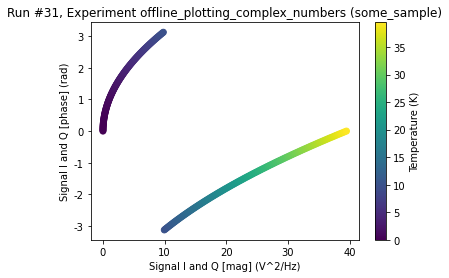

In [15]:
axs, cbs = plot_dataset(ds3, complex_plot_type='mag_and_phase')